# Proyecto: SQL avanzado  & ETL

## Librerías

In [1]:
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import Table, Column, Integer, String, MetaData, ForeignKey
from sqlalchemy import inspect
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

## Conexión

In [2]:
engine = create_engine('sqlite:///chinook.db')
engine

Engine(sqlite:///chinook.db)

In [3]:
metadata = MetaData()

# This method instantiates the tables that already 
# exist in the database, which the engine is connected to. 
metadata.create_all(engine)

# Checking this out, we can see the table structure and variable types for the employees table
inspector = inspect(engine)

# Checked out the columns in the employees table
inspector.get_columns('albums')
inspector.get_columns('artists')
inspector.get_columns('customers')
inspector.get_columns('employees')
inspector.get_columns('genres')
inspector.get_columns('invoice_items')
inspector.get_columns('invoices')
inspector.get_columns('media_types')
inspector.get_columns('playlist_track')
inspector.get_columns('playlists')
inspector.get_columns('tracks')

[{'name': 'TrackId',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'Name',
  'type': NVARCHAR(length=200),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'AlbumId',
  'type': INTEGER(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'MediaTypeId',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'GenreId',
  'type': INTEGER(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'Composer',
  'type': NVARCHAR(length=220),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'Milliseconds',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'Bytes',
  'type': INTEGER(),
  'nullable': True,
  'd

## Proceso de Extracción

In [4]:
with engine.connect() as con:
    
    rs = con.execute("""SELECT employees.LastName || " " || employees.FirstName AS Empleado,
       genres.Name AS Género,
       media_types.Name AS MediaType,
       ROUND(SUM(invoices.Total), 2) AS [Total Ventas por género],
       Count(genres.Name) AS [Cantidad ventas por género]
  FROM employees
       INNER JOIN
       customers ON employees.EmployeeId = customers.SupportRepId
       INNER JOIN
       invoices ON customers.CustomerId = invoices.CustomerId
       INNER JOIN
       invoice_items ON invoices.InvoiceId = invoice_items.InvoiceId
       INNER JOIN
       tracks ON invoice_items.TrackId = tracks.TrackId
       INNER JOIN
       genres ON tracks.GenreId = genres.GenreId
       INNER JOIN
       media_types ON tracks.MediaTypeId = media_types.MediaTypeId
 GROUP BY Empleado,
          genres.Name
 ORDER BY genres.Name;""")
    
    for row in rs:
        print(row)

('Park Margaret', 'Alternative', 'Protected AAC audio file', 63.44, 4)
('Peacock Jane', 'Alternative', 'Protected AAC audio file', 147.73, 10)
('Johnson Steve', 'Alternative & Punk', 'MPEG audio file', 721.01, 89)
('Park Margaret', 'Alternative & Punk', 'MPEG audio file', 724.68, 84)
('Peacock Jane', 'Alternative & Punk', 'MPEG audio file', 515.97, 71)
('Johnson Steve', 'Blues', 'MPEG audio file', 142.56, 25)
('Park Margaret', 'Blues', 'MPEG audio file', 135.63, 17)
('Peacock Jane', 'Blues', 'MPEG audio file', 151.47, 19)
('Johnson Steve', 'Bossa Nova', 'MPEG audio file', 4.95, 3)
('Park Margaret', 'Bossa Nova', 'MPEG audio file', 41.58, 3)
('Peacock Jane', 'Bossa Nova', 'MPEG audio file', 39.6, 9)
('Johnson Steve', 'Classical', 'Protected AAC audio file', 28.71, 7)
('Park Margaret', 'Classical', 'Protected AAC audio file', 142.66, 15)
('Peacock Jane', 'Classical', 'Protected AAC audio file', 145.67, 19)
('Johnson Steve', 'Comedy', 'Protected MPEG-4 video file', 42.74, 3)
('Peacock Jan

In [5]:
with engine.connect() as con:
    
    rs = con.execute("""SELECT employees.LastName || " " || employees.FirstName AS Empleado,
       genres.Name AS Género,
       media_types.Name AS MediaType,
       ROUND(SUM(invoices.Total), 2) AS [Total Ventas por género],
       Count(genres.Name) AS [Cantidad ventas por género]
  FROM employees
       INNER JOIN
       customers ON employees.EmployeeId = customers.SupportRepId
       INNER JOIN
       invoices ON customers.CustomerId = invoices.CustomerId
       INNER JOIN
       invoice_items ON invoices.InvoiceId = invoice_items.InvoiceId
       INNER JOIN
       tracks ON invoice_items.TrackId = tracks.TrackId
       INNER JOIN
       genres ON tracks.GenreId = genres.GenreId
       INNER JOIN
       media_types ON tracks.MediaTypeId = media_types.MediaTypeId
 GROUP BY Empleado,
          genres.Name
 ORDER BY genres.Name;""")
    
    for row in rs:
        print(row)

('Park Margaret', 'Alternative', 'Protected AAC audio file', 63.44, 4)
('Peacock Jane', 'Alternative', 'Protected AAC audio file', 147.73, 10)
('Johnson Steve', 'Alternative & Punk', 'MPEG audio file', 721.01, 89)
('Park Margaret', 'Alternative & Punk', 'MPEG audio file', 724.68, 84)
('Peacock Jane', 'Alternative & Punk', 'MPEG audio file', 515.97, 71)
('Johnson Steve', 'Blues', 'MPEG audio file', 142.56, 25)
('Park Margaret', 'Blues', 'MPEG audio file', 135.63, 17)
('Peacock Jane', 'Blues', 'MPEG audio file', 151.47, 19)
('Johnson Steve', 'Bossa Nova', 'MPEG audio file', 4.95, 3)
('Park Margaret', 'Bossa Nova', 'MPEG audio file', 41.58, 3)
('Peacock Jane', 'Bossa Nova', 'MPEG audio file', 39.6, 9)
('Johnson Steve', 'Classical', 'Protected AAC audio file', 28.71, 7)
('Park Margaret', 'Classical', 'Protected AAC audio file', 142.66, 15)
('Peacock Jane', 'Classical', 'Protected AAC audio file', 145.67, 19)
('Johnson Steve', 'Comedy', 'Protected MPEG-4 video file', 42.74, 3)
('Peacock Jan

In [6]:
with engine.connect() as con:
    
    rs = con.execute("""SELECT Country, COUNT(CustomerId) FROM customers GROUP BY Country""")
    
    for row in rs:
        print(row)

('Argentina', 1)
('Australia', 1)
('Austria', 1)
('Belgium', 1)
('Brazil', 5)
('Canada', 8)
('Chile', 1)
('Czech Republic', 2)
('Denmark', 1)
('Finland', 1)
('France', 5)
('Germany', 4)
('Hungary', 1)
('India', 2)
('Ireland', 1)
('Italy', 1)
('Netherlands', 1)
('Norway', 1)
('Poland', 1)
('Portugal', 2)
('Spain', 1)
('Sweden', 1)
('USA', 13)
('United Kingdom', 3)


## Proceso de transformación 

In [7]:
df = pd.read_sql_query("""SELECT invoices.InvoiceId AS [ID Factura],
       employees.LastName || " " || employees.FirstName AS Empleado,
       artists.Name AS Artista,
       albums.Title AS Album,
       employees.Title AS [Tipo de Empleado]
  FROM employees
       INNER JOIN
       customers ON employees.EmployeeId = customers.SupportRepId
       INNER JOIN
       invoices ON customers.CustomerId = invoices.CustomerId
       INNER JOIN
       invoice_items ON invoices.InvoiceId = invoice_items.InvoiceId
       INNER JOIN
       tracks ON invoice_items.TrackId = tracks.TrackId
       INNER JOIN
       albums ON tracks.AlbumId = albums.AlbumId
       INNER JOIN
       artists ON albums.ArtistId = artists.ArtistId
 ORDER BY (invoices.InvoiceId) ASC;
    
    """, 
    con=engine.connect())

In [8]:
#Consulte todas las facturas vendidas, mostrando:
#El id de la factura-- Los Albums que se vendieron por factura
#El artista del Album-- El empleado que registró la factura
#El tipo de Empleado que lo vendió
#Ordene de forma ascendente de acuerdo al Id de la Factura (De las más antigua a la más nueva)
df2 = pd.read_sql_query("""SELECT invoices.InvoiceId AS [ID Factura],
       employees.LastName || " " || employees.FirstName AS Empleado,
       artists.Name AS Artista,
       albums.Title AS Album,
       employees.Title AS [Tipo de Empleado]
  FROM employees
       INNER JOIN
       customers ON employees.EmployeeId = customers.SupportRepId
       INNER JOIN
       invoices ON customers.CustomerId = invoices.CustomerId
       INNER JOIN
       invoice_items ON invoices.InvoiceId = invoice_items.InvoiceId
       INNER JOIN
       tracks ON invoice_items.TrackId = tracks.TrackId
       INNER JOIN
       albums ON tracks.AlbumId = albums.AlbumId
       INNER JOIN
       artists ON albums.ArtistId = artists.ArtistId
 ORDER BY (invoices.InvoiceId) ASC;
    
    """, 
    con=engine.connect())


In [9]:
df3 = pd.read_sql_query("SELECT Country, COUNT(CustomerId) FROM customers GROUP BY Country", con=engine.connect())

In [10]:
def graficoCiudadClientes():
    con = sqlite3.connect("chinook.db")
    df = pd.read_sql_query("SELECT Country, COUNT(CustomerId) FROM customers GROUP BY Country", con)
    columna1=df['Country']
    columna1
    columna2=df['COUNT(CustomerId)']
    plt.figure(figsize=(10,10))

    plt.barh(columna1, columna2, color="green")
    ## Legenda en el eje y
    plt.ylabel('Países ')
 
    ## Legenda en el eje x
    plt.xlabel('Cantidad Clientes')
    plt.title('Países de los clientes')
    plt.show()
    con.close()

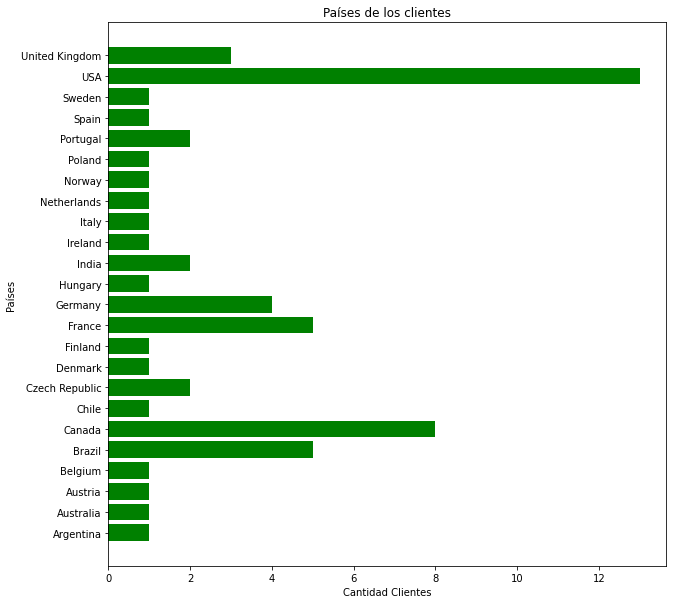

In [11]:
graficoCiudadClientes()

## Proceso de Carga

In [12]:
df.to_csv("Consulta1.csv")

In [13]:
df2.to_csv("Consulta2.csv")


In [14]:
df3.to_csv("Consulta3.csv")